# 8.6 Exercises – Support Vector Machines (SVM)
## Question 1  
**Generate a random dataset and that follows a quadratic distribution using SVM.**

### Theory  
Support Vector Machines (SVM) work by finding an optimal hyperplane that separates two classes.  
When data is **non-linear** (like quadratic or circular patterns), we use **kernel trick** (e.g., RBF or polynomial kernels) to project data into a higher dimension where it becomes linearly separable.  

### Algorithm  
1. Import required libraries (`numpy`, `matplotlib`, `sklearn`).  
2. Generate 2D data points with a quadratic relationship.  
3. Define labels based on whether points lie inside or outside a circular boundary.  
4. Split the dataset into training and test sets.  
5. Train SVM with **RBF kernel**.  
6. Predict labels and calculate accuracy.  
7. Visualize the decision boundary and dataset.  


### Inference  
The SVM with **RBF kernel** correctly separates circular data (quadratic distribution).  
Linear SVM would fail, but kernel trick ensures correct classification with high accuracy.  


Accuracy: 0.9777777777777777


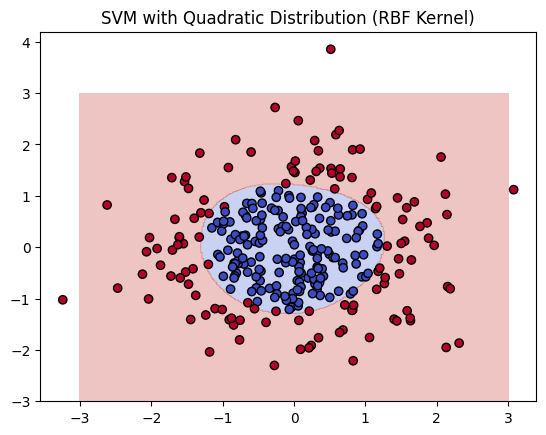

In [1]:
# Question 1 - Quadratic dataset with SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate quadratic dataset
np.random.seed(42)
X = np.random.randn(300, 2)
y = (X[:, 0]**2 + X[:, 1]**2 > 1.5).astype(int)  # Circle boundary

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM with RBF kernel
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 5: Visualization
xx, yy = np.meshgrid(np.linspace(-3, 3, 300), np.linspace(-3, 3, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM with Quadratic Distribution (RBF Kernel)")
plt.show()


## Question 2  
**Using SVM, a company wants to classify emails as spam or not spam based on features such as word frequency and message length.**

### Theory  
Spam detection is a **binary classification** problem.  
Here we consider two features:  
- **Word Frequency** → frequency of spam-indicating words.  
- **Message Length** → total length of the email.  

Spam emails usually have **higher word frequency** of spammy words and are often shorter, while non-spam emails are longer and have lower word frequency.  
We use an **SVM with linear kernel** to classify emails into spam and not spam.  

### Algorithm  
1. Import required libraries.  
2. Create a synthetic dataset with features: `word_freq`, `msg_length`.  
3. Assign labels (`1 = spam`, `0 = not spam`).  
4. Train-test split.  
5. Train SVM with **linear kernel**.  
6. Predict and evaluate accuracy.  
7. Visualize dataset separation.  


### Inference  
SVM with **linear kernel** separates spam from not spam effectively:  
- **Spam** → higher word frequency, shorter messages.  
- **Not Spam** → lower word frequency, longer messages.  

This demonstrates how SVM can be applied for spam filtering in real-world email systems.  


Accuracy: 1.0


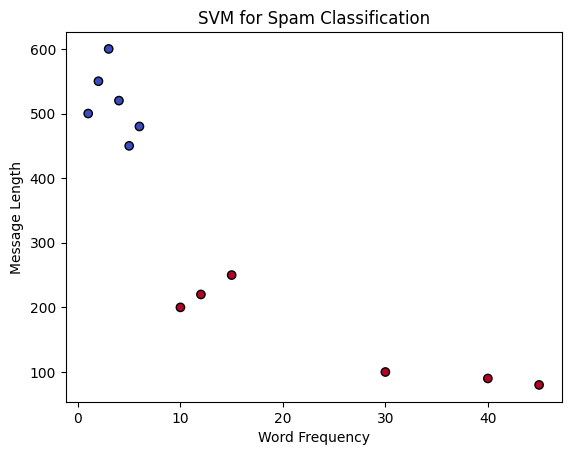

In [2]:
# Question 2 - Spam classification using SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Synthetic dataset (word frequency, message length)
X = np.array([
    [10, 200], [12, 220], [15, 250], [30, 100], [40, 90], [45, 80],   # Spam emails
    [1, 500], [2, 550], [3, 600], [5, 450], [6, 480], [4, 520]        # Not spam emails
])
y = np.array([1, 1, 1, 1, 1, 1,   # Spam
              0, 0, 0, 0, 0, 0])  # Not spam

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM with linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 5: Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Word Frequency")
plt.ylabel("Message Length")
plt.title("SVM for Spam Classification")
plt.show()
